In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import LogNorm
from collections import defaultdict

In [ ]:
# cluster_dir = './drop_model_movement'
# rect_csv = 'floor_overlay_labels.csv'
# pix_to_m = 0.003175
# T = pd.read_csv(os.path.join(cluster_dir, rect_csv))
# cluster_pattern = 'cluster_*.csv'
# csv_files = sorted(glob.glob(os.path.join(cluster_dir, cluster_pattern)))

Map out floor plan

In [3]:
def floor_rects_metric_inline(csvfile='floor_overlay_labels.csv', show_text=True):

    """Maps floorplan, like matlab file"""
    pix_to_m = 0.003175

    # Read CSV file
    T = pd.read_csv(csvfile)

    # Create plot
    fig, ax = plt.subplots()

    for _, row in T.iterrows():
        x = row['x'] * pix_to_m
        y = row['y'] * pix_to_m
        w = row['width'] * pix_to_m
        h = row['height'] * pix_to_m

        rect = plt.Rectangle((x, y), w, h, edgecolor=[0.5, 0.5, 0.5], facecolor='none', linewidth=1)
        ax.add_patch(rect)

        if show_text:
            ax.text(x, y + h + 0.05, row['name'], color='black', fontsize=8,
                    verticalalignment='bottom', horizontalalignment='left')

    ax.set_aspect('equal')
    plt.xlabel('Meters')
    plt.ylabel('Meters')
    plt.title('Floor Overlay Rectangles')
    ax.autoscale_view()
    plt.tight_layout()

    plt.show()

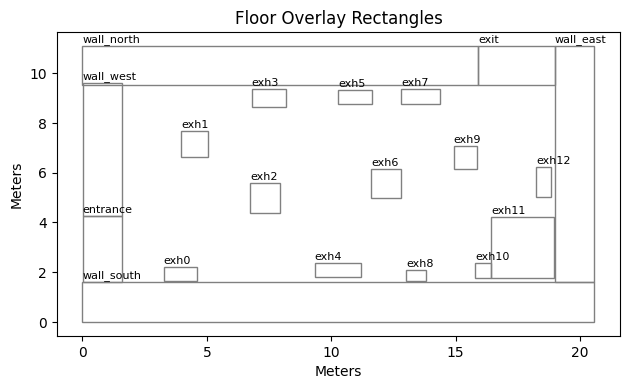

In [4]:
#sample use, insert file path into function, maps out floor plan
floor_rects_metric_inline('/Users/iuliarusu/Documents/museum/drop_model_movement/floor_overlay_labels.csv')

Floorplan + trajectories

In [5]:
def floorplan_trajectories(
    rect_csv='floor_overlay_labels.csv',
    cluster_pattern='cluster_*.csv',
    cluster_dir='.',
    plot_separate=True,
    filter_files=None          # list of filenames (e.g. ['cluster_005.csv'])
):
    """
    Draw the floor plan and overlay selected trajectory from CSVs

    Parameters:
    rect_csv : CSV containing rectangle definitions 
    
    plot_separate : bool
        If True, make a subplot grid of individual traces
    filter_files : If provided, only plot these filenames
    """
    pix_to_m = 0.003175

    # read floor rectangles 
    rect_path = os.path.join(cluster_dir, rect_csv)
    T = pd.read_csv(rect_path)

    # get trajectory files 
    all_files = sorted(glob.glob(os.path.join(cluster_dir, cluster_pattern)))
    if filter_files:
        wanted = {os.path.basename(f) for f in filter_files}
        csv_files = [f for f in all_files if os.path.basename(f) in wanted]
    else:
        csv_files = all_files

    n_files = len(csv_files)
    colors = cm.get_cmap('tab20', n_files)

    
    fig1, ax1 = plt.subplots(figsize=(8, 6))

    # draw rectangles
    for _, row in T.iterrows():
        x, y = row['x'] * pix_to_m, row['y'] * pix_to_m
        w, h = row['width'] * pix_to_m, row['height'] * pix_to_m
        ax1.add_patch(plt.Rectangle((x, y), w, h,
                                    edgecolor='gray', facecolor='none', lw=1))
        ax1.text(x, y + h + 0.05, row['name'],
                 fontsize=8, color='black', va='bottom', ha='left')

    # draw trajectories
    for i, f in enumerate(csv_files):
        data = pd.read_csv(f)
        x = data.iloc[:, 1] * pix_to_m
        y = data.iloc[:, 2] * pix_to_m
        ax1.plot(x, y, '.', color=colors(i), lw=0.5, ms=1,
                 label=os.path.basename(f))

    ax1.set_xlim(-1000 * pix_to_m, 7000 * pix_to_m)
    ax1.set_ylim(0, 3500 * pix_to_m)
    ax1.set_aspect('equal')
    ax1.set_xlabel('X (m)')
    ax1.set_ylabel('Y (m)')
    ax1.set_title('Floor Plan and Selected Trajectories')
    ax1.legend(fontsize=6, loc='upper right', bbox_to_anchor=(1.35, 1.0))
    plt.tight_layout()
    plt.show()

    if plot_separate and n_files:
            cols = 4
            rows = int(np.ceil(n_files / cols))
            fig2, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
            axes = axes.flatten()

            for i, f in enumerate(csv_files):
                data = pd.read_csv(f)
                x = data.iloc[:, 1] * pix_to_m
                y = data.iloc[:, 2] * pix_to_m
                ax = axes[i]

                # draw floor rectangles on each subplot
                for _, row in T.iterrows():
                    rect_x = row['x'] * pix_to_m
                    rect_y = row['y'] * pix_to_m
                    rect_w = row['width'] * pix_to_m
                    rect_h = row['height'] * pix_to_m
                    ax.add_patch(plt.Rectangle(
                        (rect_x, rect_y), rect_w, rect_h,
                        edgecolor='gray', facecolor='none', lw=0.5))
                    ax.text(rect_x, rect_y + rect_h + 0.02, row['name'],
                            fontsize=5, color='black', va='bottom', ha='left')

                ax.plot(x, y, '.', color=colors(i), lw=0.5, ms=1)
                ax.set_xlim(-1000 * pix_to_m, 7000 * pix_to_m)
                ax.set_ylim(0, 3500 * pix_to_m)
                ax.set_aspect('equal')
                ax.set_title(f"cluster {os.path.basename(f)[8:11]}", fontsize=7)

            # remove empty panels
            for j in range(i + 1, len(axes)):
                fig2.delaxes(axes[j])

            plt.tight_layout()
            plt.show()

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_58166/59514556.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', n_files)


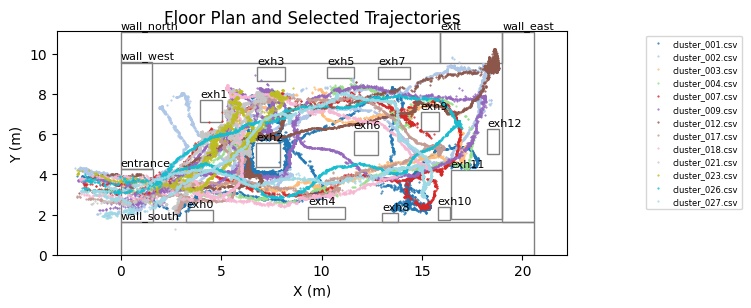

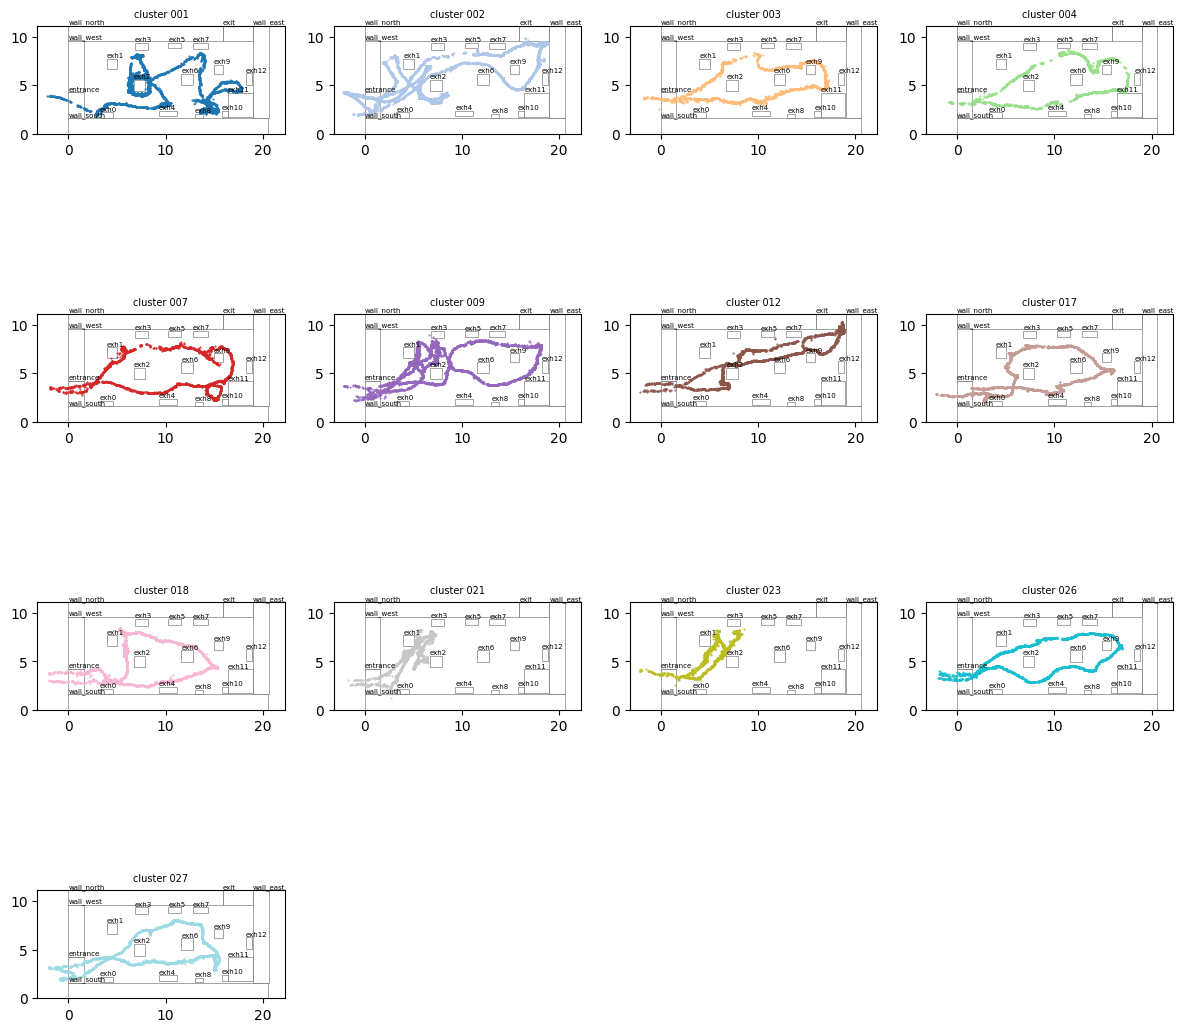

In [6]:
#example usage, plots all
floorplan_trajectories(cluster_dir='drop_model_movement')

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_58166/59514556.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', n_files)


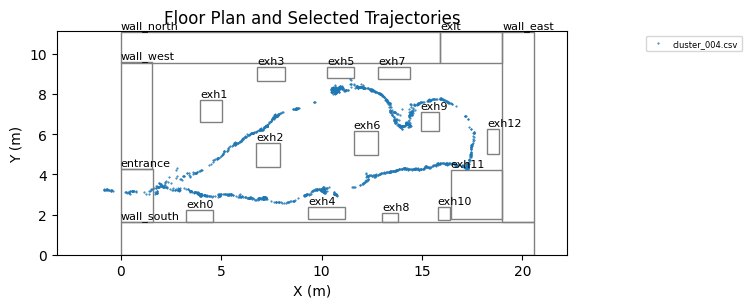

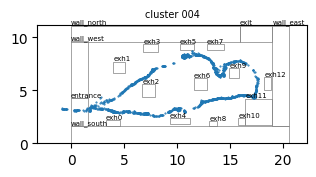

In [7]:
#plots only selected files
floorplan_trajectories(
    cluster_dir='drop_model_movement',
    filter_files=['cluster_004.csv']
)

# divide floorplan into state space

this includes two functions:
"compute_walkable_mask", one that removes unwalkable locations from the floorplan, and "discretize_walkable_area" gives a state_map and state_lookup

In [8]:
def compute_walkable_mask(rect_csv, pix_to_m=0.003175, resolution=0.05, extra_exclude=None ): #resolution in meters
    """
    Compute a binary mask  where (True = walkable) of the museum floor layout.
    Excludes parts of the museum that are closed to foot-traffic

    Parameters
 
    rect_csv : str
        CSV path with floorplan rectangles (x, y, width, height, name).
    pix_to_m : float
        Scaling factor from pixels to meters.
    resolution : float
        Size of each grid cell in meters.

    Returns
 
    walkable_mask : 2D np.array (bool)
        True where walkable, False where exhibit or wall.
    x_grid, y_grid : 2D np.arrays
        X and Y coordinate meshgrids (in meters).
    """

    T = pd.read_csv(rect_csv)

    # overall floorplan bounds
    x_max = ((T['x'] + T['width']) * pix_to_m).max()
    y_max = ((T['y'] + T['height']) * pix_to_m).max()

    x_coords = np.arange(0, x_max, resolution)
    y_coords = np.arange(0, y_max, resolution)
    x_grid, y_grid = np.meshgrid(x_coords, y_coords)

    mask = np.ones_like(x_grid, dtype=bool)

    # say what to exclude
    default_exclude = ['exit', 'wall_north', 'wall_south', 'wall_west', 'wall_east'] + \
                      [f"exh{i}" for i in range(20)]
    if extra_exclude: 
        default_exclude.extend(extra_exclude)

    # exclude interior objects (walls, exhibits)
    for _, row in T.iterrows():
        name = str(row['name']).strip().lower()
        if any(ex in name for ex in default_exclude):
            rx = row['x'] * pix_to_m
            ry = row['y'] * pix_to_m
            rw = row['width'] * pix_to_m
            rh = row['height'] * pix_to_m
            inside_x = (x_grid >= rx) & (x_grid <= rx + rw)
            inside_y = (y_grid >= ry) & (y_grid <= ry + rh)
            mask &= ~(inside_x & inside_y)

    # exclude outer perimeter
    interior = T[~T['name'].str.contains('wall', case=False)]
    x0 = (interior['x'] * pix_to_m).min()
    x1 = ((interior['x'] + interior['width']) * pix_to_m).max()
    y0 = (interior['y'] * pix_to_m).min()
    y1 = ((interior['y'] + interior['height']) * pix_to_m).max()

    inside_bounds = (x_grid >= x0) & (x_grid <= x1) & (y_grid >= y0) & (y_grid <= y1)
    mask &= inside_bounds

    return mask, x_grid, y_grid


In [9]:
#example use, computes which area in museum is walkable, sets a resolution
mask, xg, yg = compute_walkable_mask('drop_model_movement/floor_overlay_labels.csv', resolution=0.3)

In [10]:
def discretize_walkable_area(mask, xg, yg):
    """
    Converts the walkable boolean mask into discrete state grid.

    Parameters

    mask : 2D np.array (bool)
        True where walkable.
    xg, yg : 2D np.array
        Meshgrid of X and Y coordinates (same shape as mask).

    Returns

    state_map : 2D np.array (int)
        Grid of same shape as mask: each walkable cell has a unique state ID,
        non-walkable cells are -1.
    state_lookup : dict[int, tuple[float, float]]
        Maps state ID to (x, y) coordinate center of that state.
    """
    state_map = -1 * np.ones_like(mask, dtype=int)  # default -1 = not walkable
    state_lookup = {}

    state_id = 0
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i, j]:
                state_map[i, j] = state_id
                state_lookup[state_id] = (xg[i, j], yg[i, j])
                state_id += 1

    return state_map, state_lookup

In [11]:
#usage, requires output from compute_walkable_mask function
state_map, state_lookup = discretize_walkable_area(mask, xg, yg)

# plotting

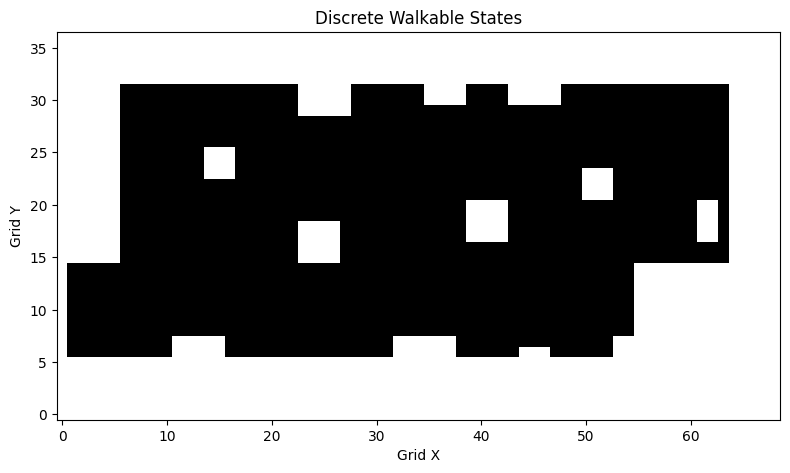

In [12]:
#plots the 
plt.figure(figsize=(8, 6))
plt.imshow(mask == True, cmap='Greys', origin='lower')
plt.title("Discrete Walkable States")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.tight_layout()
plt.show()

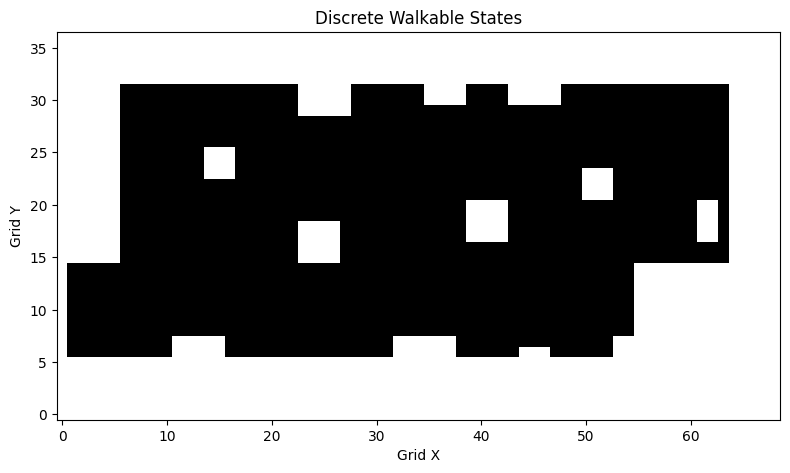

In [17]:
#same way of plotting but using state_map
#plots the 
plt.figure(figsize=(8, 6))
plt.imshow(state_map >= 0, cmap='Greys', origin='lower')
plt.title("Discrete Walkable States")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.tight_layout()
plt.show()

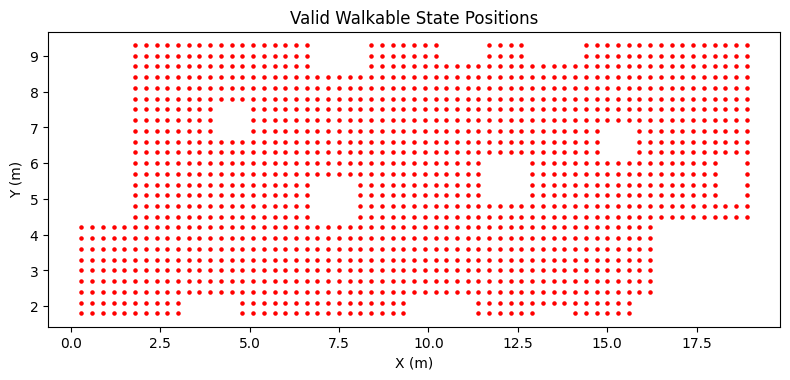

In [14]:
xs = [x for sid, (x, y) in state_lookup.items()]
ys = [y for sid, (x, y) in state_lookup.items()]

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c='red', s=5)
plt.gca().set_aspect('equal')
plt.title("Valid Walkable State Positions")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.tight_layout()
plt.show()

In [15]:
xs

[np.float64(0.3),
 np.float64(0.6),
 np.float64(0.8999999999999999),
 np.float64(1.2),
 np.float64(1.5),
 np.float64(1.7999999999999998),
 np.float64(2.1),
 np.float64(2.4),
 np.float64(2.6999999999999997),
 np.float64(3.0),
 np.float64(4.8),
 np.float64(5.1),
 np.float64(5.3999999999999995),
 np.float64(5.7),
 np.float64(6.0),
 np.float64(6.3),
 np.float64(6.6),
 np.float64(6.8999999999999995),
 np.float64(7.199999999999999),
 np.float64(7.5),
 np.float64(7.8),
 np.float64(8.1),
 np.float64(8.4),
 np.float64(8.7),
 np.float64(9.0),
 np.float64(9.299999999999999),
 np.float64(11.4),
 np.float64(11.7),
 np.float64(12.0),
 np.float64(12.299999999999999),
 np.float64(12.6),
 np.float64(12.9),
 np.float64(14.1),
 np.float64(14.399999999999999),
 np.float64(14.7),
 np.float64(15.0),
 np.float64(15.299999999999999),
 np.float64(15.6),
 np.float64(0.3),
 np.float64(0.6),
 np.float64(0.8999999999999999),
 np.float64(1.2),
 np.float64(1.5),
 np.float64(1.7999999999999998),
 np.float64(2.1),
 np

In [16]:
ys

[np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float64(1.7999999999999998),
 np.float6

estimate agregate policy
